### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [3]:
modeling_df = pd.read_csv('poly_model.csv', index_col = 'Unnamed: 0')

In [4]:
modeling_df.head()

,Real,follows_to_followedby_ratio,followed_by.count,follows.count,is_private,media.count,ex_url_exists,bio_exists,prof_pic_duplicate,followed_by.count follows.count,followed_by.count is_private,followed_by.count media.count,followed_by.count ex_url_exists,followed_by.count bio_exists,followed_by.count prof_pic_duplicate,follows.count is_private,follows.count media.count,follows.count ex_url_exists,follows.count bio_exists,follows.count prof_pic_duplicate,is_private media.count,is_private ex_url_exists,is_private bio_exists,is_private prof_pic_duplicate,media.count ex_url_exists,media.count bio_exists,media.count prof_pic_duplicate,ex_url_exists bio_exists,ex_url_exists prof_pic_duplicate,bio_exists prof_pic_duplicate
0,1,0.174782,801.0,140.0,0.0,402.0,1.0,1.0,0.0,112140.0,0.0,322002.0,801.0,801.0,0.0,0.0,56280.0,140.0,140.0,0.0,0.0,0.0,0.0,0.0,402.0,402.0,0.0,1.0,0.0,0.0
1,1,0.007451,56500.0,421.0,0.0,472.0,1.0,1.0,0.0,23786500.0,0.0,26668000.0,56500.0,56500.0,0.0,0.0,198712.0,421.0,421.0,0.0,0.0,0.0,0.0,0.0,472.0,472.0,0.0,1.0,0.0,0.0
2,1,0.139192,53250.0,7412.0,0.0,1145.0,1.0,1.0,0.0,394689000.0,0.0,60971250.0,53250.0,53250.0,0.0,0.0,8486740.0,7412.0,7412.0,0.0,0.0,0.0,0.0,0.0,1145.0,1145.0,0.0,1.0,0.0,0.0
3,1,0.007892,54611.0,431.0,0.0,750.0,1.0,1.0,0.0,23537341.0,0.0,40958250.0,54611.0,54611.0,0.0,0.0,323250.0,431.0,431.0,0.0,0.0,0.0,0.0,0.0,750.0,750.0,0.0,1.0,0.0,0.0
4,1,0.020107,50928.0,1024.0,0.0,906.0,0.0,1.0,0.0,52150272.0,0.0,46140768.0,0.0,50928.0,0.0,0.0,927744.0,0.0,1024.0,0.0,0.0,0.0,0.0,0.0,0.0,906.0,0.0,0.0,0.0,0.0


In [5]:
nan_vals = modeling_df[modeling_df['follows_to_followedby_ratio'].isnull()].index.tolist()

In [6]:
for i in nan_vals:
    modeling_df.loc[i,'follows_to_followedby_ratio'] = 0

In [7]:
inf_vals = modeling_df[modeling_df['follows_to_followedby_ratio']== float('inf')].index.tolist()

In [8]:
for i in inf_vals:
    modeling_df.loc[i,'follows_to_followedby_ratio'] = modeling_df.loc[i,'follows.count']

In [9]:
modeling_df.loc[inf_vals]

,Real,follows_to_followedby_ratio,followed_by.count,follows.count,is_private,media.count,ex_url_exists,bio_exists,prof_pic_duplicate,followed_by.count follows.count,followed_by.count is_private,followed_by.count media.count,followed_by.count ex_url_exists,followed_by.count bio_exists,followed_by.count prof_pic_duplicate,follows.count is_private,follows.count media.count,follows.count ex_url_exists,follows.count bio_exists,follows.count prof_pic_duplicate,is_private media.count,is_private ex_url_exists,is_private bio_exists,is_private prof_pic_duplicate,media.count ex_url_exists,media.count bio_exists,media.count prof_pic_duplicate,ex_url_exists bio_exists,ex_url_exists prof_pic_duplicate,bio_exists prof_pic_duplicate
668,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1597,1,379.0,0.0,379.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,379.0,0.0,0.0,379.0,379.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5873,1,3.0,0.0,3.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
16109,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16265,0,7483.0,0.0,7483.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7483.0,0.0,0.0,0.0,7483.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16338,0,7496.0,0.0,7496.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7496.0,0.0,0.0,0.0,7496.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16352,0,7496.0,0.0,7496.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7496.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16385,0,7489.0,0.0,7489.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7489.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16479,0,7493.0,0.0,7493.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7493.0,0.0,0.0,0.0,7493.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16543,0,7502.0,0.0,7502.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7502.0,7502.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(modeling_df.drop('Real', axis=1), modeling_df['Real'], test_size=.2, random_state= 14)

# Transformations

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [13]:
ss = StandardScaler()

In [14]:
X_train_ss = ss.fit_transform(X_train)

In [15]:
X_test_ss = ss.transform(X_test)

# Models

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

In [17]:
def classify_users(classifier, X_train, X_test, y_train, y_test):
    '''
    Train a classifier to identify if user is real or fake 
    
    '''
    #fit the classifier with our training data
    classifier.fit(X_train, y_train)
    
    #predict the labels of our train data and store them in train_preds
    train_preds = classifier.predict(X_train)

    #predict the labels of our test data and store them in test_preds
    test_preds = classifier.predict(X_test)
    
    print('Training accuracy: ', accuracy_score(y_train, train_preds))
    print('Testing accuracy: ', accuracy_score(y_test, test_preds))
    
    print('Testing Report: \n',classification_report(y_test, test_preds))
    
    cm_nb = confusion_matrix(y_test, test_preds)
    plt.figure(figsize = (6, 6));
    plt.title(classifier);
    
    return sns.heatmap(cm_nb, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu"), plt.xlabel('Predicted Label'),plt.ylabel('True Label');


## K Nearest Neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=11, n_jobs=-1)

Training accuracy:  0.936400937866354
Testing accuracy:  0.9293876355112805
Testing Report: 
               precision    recall  f1-score   support

           0       0.94      0.91      0.92      1556
           1       0.92      0.95      0.94      1857

   micro avg       0.93      0.93      0.93      3413
   macro avg       0.93      0.93      0.93      3413
weighted avg       0.93      0.93      0.93      3413



(<matplotlib.axes._subplots.AxesSubplot at 0x1a2307d940>,
 Text(0.5, 62.15999999999998, 'Predicted Label'),
 Text(33.0, 0.5, 'True Label'))

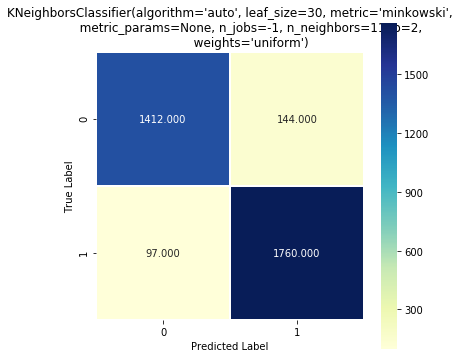

In [20]:
classify_users(knn, X_train_ss, X_test_ss, y_train, y_test)